In [1]:
#LES-5
#RFI Analysis 
import struct
import datetime
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt

#to inspect data dynamically use %matplotlib qt

In [2]:
#open data file and determine the file lenght in bytes

with open("pass3_data", "rb") as binary_file:
    # Read the whole file at once
    byte_range = binary_file.read() 
    
file_length_in_bytes = os.path.getsize("pass3_data")
frame_count = int(file_length_in_bytes/36)

In [3]:
#create a numpy array of UNIX timestamps

ts = 0
ts_i = 0
time_stamps = np.arange(frame_count).reshape(frame_count,1)

while ts < frame_count: 
    time_stamps[ts] = struct.unpack('<I', byte_range[ts_i:ts_i+4])
    ts_i = ts_i + 36
    ts = ts + 1  
    
t = time_stamps.astype('datetime64[s]')

fc = np.arange(frame_count).reshape(frame_count,1)


In [4]:
# Create numpy array of data frames, 32 bytes per frame.  
# For LES-5 there are 32 Words (bytes) per Frame.

byte_count = 4
frame = 0
frame_words = np.arange(frame_count*32).reshape(frame_count,32)

while frame < frame_count:
    for x in range (0,32):
        frame_words[frame,x] = byte_range[byte_count+x]
    frame = frame + 1
    byte_count = (frame * 36) + 4

In [5]:
FRAME_COUNT_MASK = 12
frame0_count = 0 
frame1_count = 0
frame2_count = 0
frame3_count = 0

for x in range (0,frame_count):
        if frame_words[x,2] & FRAME_COUNT_MASK == 0:
            frame0_count = frame0_count + 1
        if frame_words[x,2] & FRAME_COUNT_MASK == 4:
            frame1_count = frame1_count + 1
        if frame_words[x,2] & FRAME_COUNT_MASK == 8:
            frame2_count = frame2_count + 1
        if frame_words[x,2] & FRAME_COUNT_MASK == 12:
            frame3_count = frame3_count + 1   
            
frame0_words = np.arange(frame0_count*32).reshape(frame0_count,32)
frame1_words = np.arange(frame1_count*32).reshape(frame1_count,32)
frame2_words = np.arange(frame2_count*32).reshape(frame2_count,32)
frame3_words = np.arange(frame3_count*32).reshape(frame3_count,32)

frame0_timestamps = np.arange(frame0_count*32).reshape(frame0_count,32)
frame1_timestamps = np.arange(frame1_count*32).reshape(frame1_count,32)
frame2_timestamps = np.arange(frame2_count*32).reshape(frame2_count,32)
frame3_timestamps = np.arange(frame3_count*32).reshape(frame3_count,32)

frame = 0
frame0_count = 0
frame1_count = 0
frame2_count = 0
frame3_count = 0

#Adding a provision to adjust the RFI experiment data in each frame by an offset
rfi_frame21_normalized = np.arange(frame_count).reshape(frame_count,1)
rfi_normal = 100
rfi_f0_offset = rfi_normal - 76
rfi_f1_offset = rfi_normal - 92
rfi_f2_offset = rfi_normal - 90
rfi_f3_offset = rfi_normal - 98

while frame < frame_count:
    if frame_words[frame,2] & FRAME_COUNT_MASK == 0: 
        for x in range (0,32):
            frame0_words[frame0_count,x] = frame_words[frame,x]
            frame0_timestamps[frame0_count] = time_stamps[frame]
            if x == 21:
                rfi_frame21_normalized[frame,0] = frame_words[frame,x] + rfi_f0_offset
        #print("FRAME 0:",frame, frame0_cnt, frame0_words[frame0_cnt,x],frame_words[frame,x])
        frame0_count = frame0_count + 1
    
    if frame_words[frame,2] & FRAME_COUNT_MASK == 4: 
        for x in range (0,32):
            frame1_words[frame1_count,x] = frame_words[frame,x]
            frame1_timestamps[frame1_count] = time_stamps[frame]
            if x == 21:
                rfi_frame21_normalized[frame,0] = frame_words[frame,x] + rfi_f1_offset
        #print("FRAME 1:",frame, frame1_cnt, frame1_words[frame1_cnt,x],frame_words[frame,x])
        frame1_count = frame1_count + 1    
    
    if frame_words[frame,2] & FRAME_COUNT_MASK == 8: 
        for x in range (0,32):
            frame2_words[frame2_count,x] = frame_words[frame,x]
            frame2_timestamps[frame2_count] = time_stamps[frame]
            if x == 21:
                rfi_frame21_normalized[frame,0] = frame_words[frame,x] + rfi_f2_offset
        #print("FRAME 2:",frame, frame2_cnt, frame2_words[frame2_cnt,x],frame_words[frame,x])
        frame2_count = frame2_count + 1    
        
    if frame_words[frame,2] & FRAME_COUNT_MASK == 12: 
        for x in range (0,32):
            frame3_words[frame3_count,x] = frame_words[frame,x]
            frame3_timestamps[frame3_count] = time_stamps[frame]
            if x == 21:
                rfi_frame21_normalized[frame,0] = frame_words[frame,x] + rfi_f3_offset
        #print("FRAME 3:",frame, frame3_cnt, frame3_words[frame3_cnt,x],frame_words[frame,x])
        frame3_count = frame3_count + 1 
    
    frame = frame + 1    

t0 = frame0_timestamps.astype('datetime64[s]')
t1 = frame1_timestamps.astype('datetime64[s]')
t2 = frame2_timestamps.astype('datetime64[s]')    
t3 = frame3_timestamps.astype('datetime64[s]')
            

In [6]:
# plot frequency

rfi_plot_f = np.arange(256).reshape(256,1)
rfi_data = np.arange(256).reshape(256,1)

rfi_plot_f[0] = 283e6

for x in range (1,256):
    rfi_plot_f[x] = rfi_plot_f[x-1] - (30e6 / 256)

frame_count_offset = 81199
    
for x in range (0,256):
    rfi_data[x] = rfi_frame21_normalized[frame_count_offset+x]
    

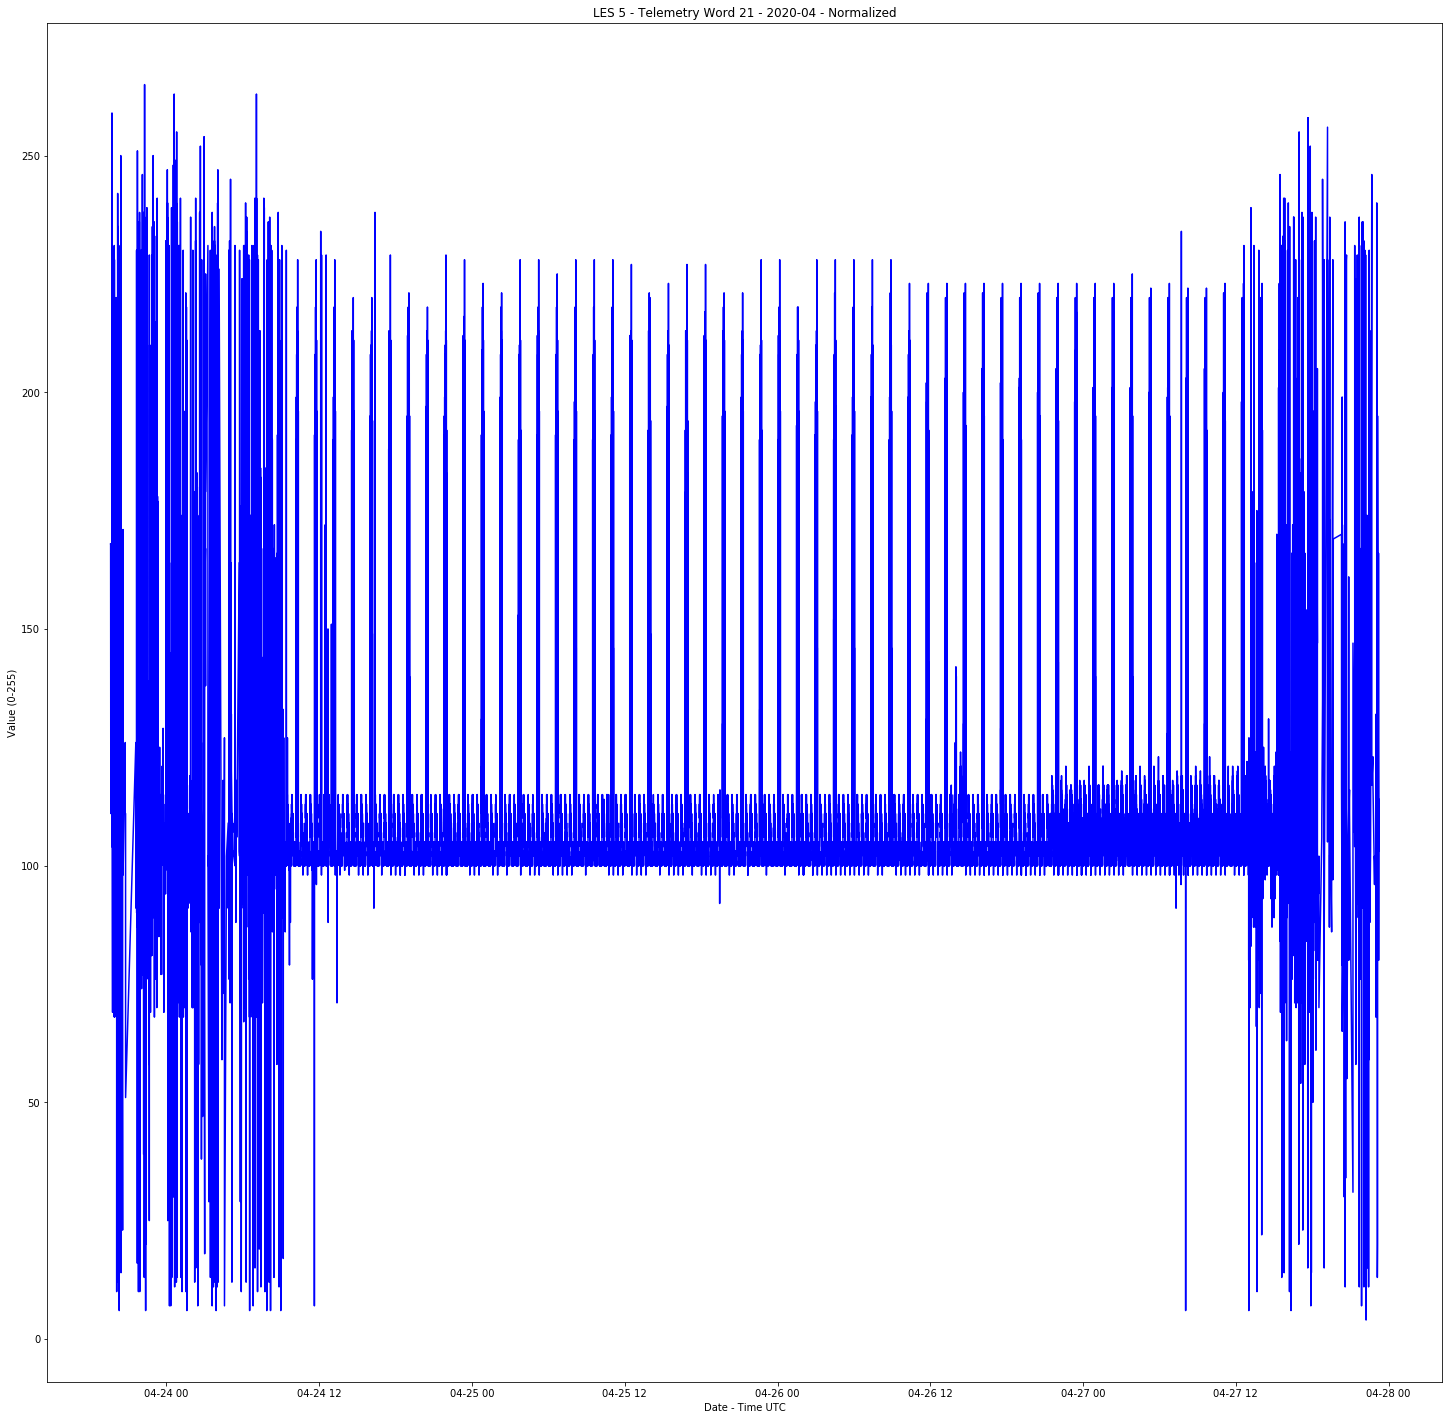

In [7]:
# RFI Experiment Channels all data

plt.figure(figsize = [25,25])
#plt.plot(fc, rfi_frame21_normalized, markersize=3, alpha=1, color='blue') # use this to find frame_count_offset to plot a single RFI scan above
plt.plot(t, rfi_frame21_normalized, markersize=1, alpha=1, color='blue')
plt.title('LES 5 - Telemetry Word 21 - 2020-04 - Normalized')
plt.xlabel('Date - Time UTC')
plt.ylabel('Value (0-255)');


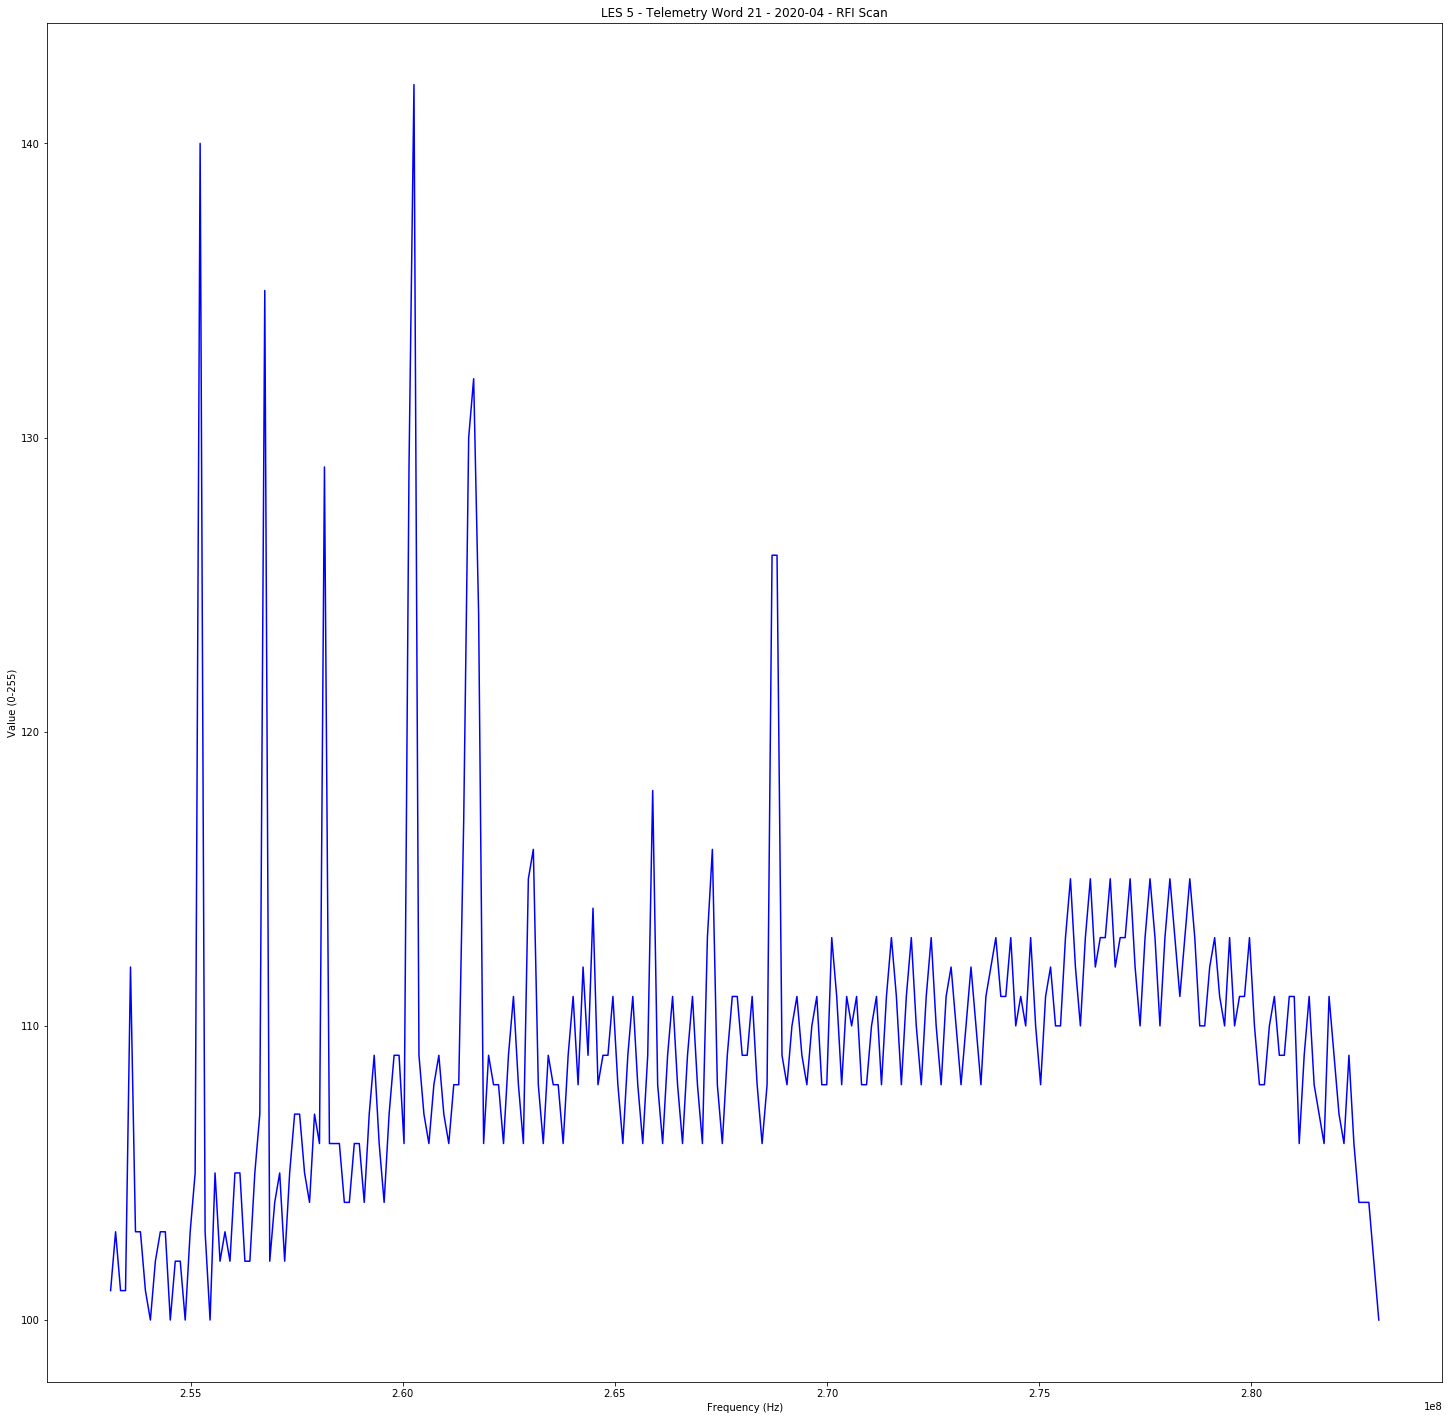

In [8]:
# Plot single RFI Scan
plt.figure(figsize = [25,25])
plt.plot(rfi_plot_f, rfi_data, markersize=3, alpha=1, color='blue')
plt.title('LES 5 - Telemetry Word 21 - 2020-04 - RFI Scan')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Value (0-255)');


In [9]:
#FRAME 0 data words
x = 0

frame0_word_0 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_1 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_2 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_3 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_4 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_5 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_6 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_7 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_8 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_9 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_10 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_11 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_12 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_13 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_14 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_15 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_16 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_17 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_18 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_19 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_20 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_21 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_22 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_23 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_24 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_25 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_26 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_27 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_28 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_29 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_30 = np.arange(frame0_count).reshape(frame0_count,1)
frame0_word_31 = np.arange(frame0_count).reshape(frame0_count,1)

for x in range (0,frame0_count):
    frame0_word_0[x] = frame0_words[x,0]
    frame0_word_1[x] = frame0_words[x,1]
    frame0_word_2[x] = frame0_words[x,2]
    frame0_word_3[x] = frame0_words[x,3]
    frame0_word_4[x] = frame0_words[x,4]
    frame0_word_5[x] = frame0_words[x,5]
    frame0_word_6[x] = frame0_words[x,6]
    frame0_word_7[x] = frame0_words[x,7]
    frame0_word_8[x] = frame0_words[x,8]
    frame0_word_9[x] = frame0_words[x,9]
    frame0_word_10[x] = frame0_words[x,10]
    frame0_word_11[x] = frame0_words[x,11]
    frame0_word_12[x] = frame0_words[x,12]
    frame0_word_13[x] = frame0_words[x,13]
    frame0_word_14[x] = frame0_words[x,14]
    frame0_word_15[x] = frame0_words[x,15]
    frame0_word_16[x] = frame0_words[x,16]
    frame0_word_17[x] = frame0_words[x,17]
    frame0_word_18[x] = frame0_words[x,18]
    frame0_word_19[x] = frame0_words[x,19]
    frame0_word_20[x] = frame0_words[x,20]
    frame0_word_21[x] = frame0_words[x,21]
    frame0_word_22[x] = frame0_words[x,22]
    frame0_word_23[x] = frame0_words[x,23]
    frame0_word_24[x] = frame0_words[x,24]
    frame0_word_25[x] = frame0_words[x,25]
    frame0_word_26[x] = frame0_words[x,26]
    frame0_word_27[x] = frame0_words[x,27]
    frame0_word_28[x] = frame0_words[x,28]
    frame0_word_29[x] = frame0_words[x,29]
    frame0_word_30[x] = frame0_words[x,30]
    frame0_word_31[x] = frame0_words[x,31]  

In [10]:
#FRAME 1 data words
x = 0

frame1_word_0 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_1 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_2 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_3 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_4 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_5 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_6 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_7 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_8 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_9 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_10 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_11 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_12 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_13 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_14 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_15 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_16 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_17 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_18 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_19 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_20 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_21 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_22 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_23 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_24 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_25 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_26 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_27 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_28 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_29 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_30 = np.arange(frame1_count).reshape(frame1_count,1)
frame1_word_31 = np.arange(frame1_count).reshape(frame1_count,1)

for x in range (0,frame1_count):
    frame1_word_0[x] = frame1_words[x,0]
    frame1_word_1[x] = frame1_words[x,1]
    frame1_word_2[x] = frame1_words[x,2]
    frame1_word_3[x] = frame1_words[x,3]
    frame1_word_4[x] = frame1_words[x,4]
    frame1_word_5[x] = frame1_words[x,5]
    frame1_word_6[x] = frame1_words[x,6]
    frame1_word_7[x] = frame1_words[x,7]
    frame1_word_8[x] = frame1_words[x,8]
    frame1_word_9[x] = frame1_words[x,9]
    frame1_word_10[x] = frame1_words[x,10]
    frame1_word_11[x] = frame1_words[x,11]
    frame1_word_12[x] = frame1_words[x,12]
    frame1_word_13[x] = frame1_words[x,13]
    frame1_word_14[x] = frame1_words[x,14]
    frame1_word_15[x] = frame1_words[x,15]
    frame1_word_16[x] = frame1_words[x,16]
    frame1_word_17[x] = frame1_words[x,17]
    frame1_word_18[x] = frame1_words[x,18]
    frame1_word_19[x] = frame1_words[x,19]
    frame1_word_20[x] = frame1_words[x,20]
    frame1_word_21[x] = frame1_words[x,21]
    frame1_word_22[x] = frame1_words[x,22]
    frame1_word_23[x] = frame1_words[x,23]
    frame1_word_24[x] = frame1_words[x,24]
    frame1_word_25[x] = frame1_words[x,25]
    frame1_word_26[x] = frame1_words[x,26]
    frame1_word_27[x] = frame1_words[x,27]
    frame1_word_28[x] = frame1_words[x,28]
    frame1_word_29[x] = frame1_words[x,29]
    frame1_word_30[x] = frame1_words[x,30]
    frame1_word_31[x] = frame1_words[x,31]  
    

In [11]:
#FRAME 2 data words
x = 0

frame2_word_0 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_1 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_2 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_3 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_4 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_5 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_6 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_7 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_8 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_9 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_10 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_11 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_12 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_13 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_14 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_15 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_16 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_17 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_18 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_19 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_20 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_21 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_22 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_23 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_24 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_25 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_26 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_27 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_28 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_29 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_30 = np.arange(frame2_count).reshape(frame2_count,1)
frame2_word_31 = np.arange(frame2_count).reshape(frame2_count,1)

for x in range (0,frame2_count):
    frame2_word_0[x] = frame2_words[x,0]
    frame2_word_1[x] = frame2_words[x,1]
    frame2_word_2[x] = frame2_words[x,2]
    frame2_word_3[x] = frame2_words[x,3]
    frame2_word_4[x] = frame2_words[x,4]
    frame2_word_5[x] = frame2_words[x,5]
    frame2_word_6[x] = frame2_words[x,6]
    frame2_word_7[x] = frame2_words[x,7]
    frame2_word_8[x] = frame2_words[x,8]
    frame2_word_9[x] = frame2_words[x,9]
    frame2_word_10[x] = frame2_words[x,10]
    frame2_word_11[x] = frame2_words[x,11]
    frame2_word_12[x] = frame2_words[x,12]
    frame2_word_13[x] = frame2_words[x,13]
    frame2_word_14[x] = frame2_words[x,14]
    frame2_word_15[x] = frame2_words[x,15]
    frame2_word_16[x] = frame2_words[x,16]
    frame2_word_17[x] = frame2_words[x,17]
    frame2_word_18[x] = frame2_words[x,18]
    frame2_word_19[x] = frame2_words[x,19]
    frame2_word_20[x] = frame2_words[x,20]
    frame2_word_21[x] = frame2_words[x,21]
    frame2_word_22[x] = frame2_words[x,22]
    frame2_word_23[x] = frame2_words[x,23]
    frame2_word_24[x] = frame2_words[x,24]
    frame2_word_25[x] = frame2_words[x,25]
    frame2_word_26[x] = frame2_words[x,26]
    frame2_word_27[x] = frame2_words[x,27]
    frame2_word_28[x] = frame2_words[x,28]
    frame2_word_29[x] = frame2_words[x,29]
    frame2_word_30[x] = frame2_words[x,30]
    frame2_word_31[x] = frame2_words[x,31]  
    

In [12]:
#FRAME 3 data words
x = 0

frame3_word_0 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_1 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_2 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_3 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_4 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_5 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_6 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_7 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_8 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_9 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_10 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_11 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_12 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_13 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_14 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_15 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_16 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_17 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_18 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_19 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_20 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_21 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_22 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_23 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_24 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_25 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_26 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_27 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_28 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_29 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_30 = np.arange(frame3_count).reshape(frame3_count,1)
frame3_word_31 = np.arange(frame3_count).reshape(frame3_count,1)

for x in range (0,frame3_count):
    frame3_word_0[x] = frame3_words[x,0]
    frame3_word_1[x] = frame3_words[x,1]
    frame3_word_2[x] = frame3_words[x,2]
    frame3_word_3[x] = frame3_words[x,3]
    frame3_word_4[x] = frame3_words[x,4]
    frame3_word_5[x] = frame3_words[x,5]
    frame3_word_6[x] = frame3_words[x,6]
    frame3_word_7[x] = frame3_words[x,7]
    frame3_word_8[x] = frame3_words[x,8]
    frame3_word_9[x] = frame3_words[x,9]
    frame3_word_10[x] = frame3_words[x,10]
    frame3_word_11[x] = frame3_words[x,11]
    frame3_word_12[x] = frame3_words[x,12]
    frame3_word_13[x] = frame3_words[x,13]
    frame3_word_14[x] = frame3_words[x,14]
    frame3_word_15[x] = frame3_words[x,15]
    frame3_word_16[x] = frame3_words[x,16]
    frame3_word_17[x] = frame3_words[x,17]
    frame3_word_18[x] = frame3_words[x,18]
    frame3_word_19[x] = frame3_words[x,19]
    frame3_word_20[x] = frame3_words[x,20]
    frame3_word_21[x] = frame3_words[x,21]
    frame3_word_22[x] = frame3_words[x,22]
    frame3_word_23[x] = frame3_words[x,23]
    frame3_word_24[x] = frame3_words[x,24]
    frame3_word_25[x] = frame3_words[x,25]
    frame3_word_26[x] = frame3_words[x,26]
    frame3_word_27[x] = frame3_words[x,27]
    frame3_word_28[x] = frame3_words[x,28]
    frame3_word_29[x] = frame3_words[x,29]
    frame3_word_30[x] = frame3_words[x,30]
    frame3_word_31[x] = frame3_words[x,31]  
    

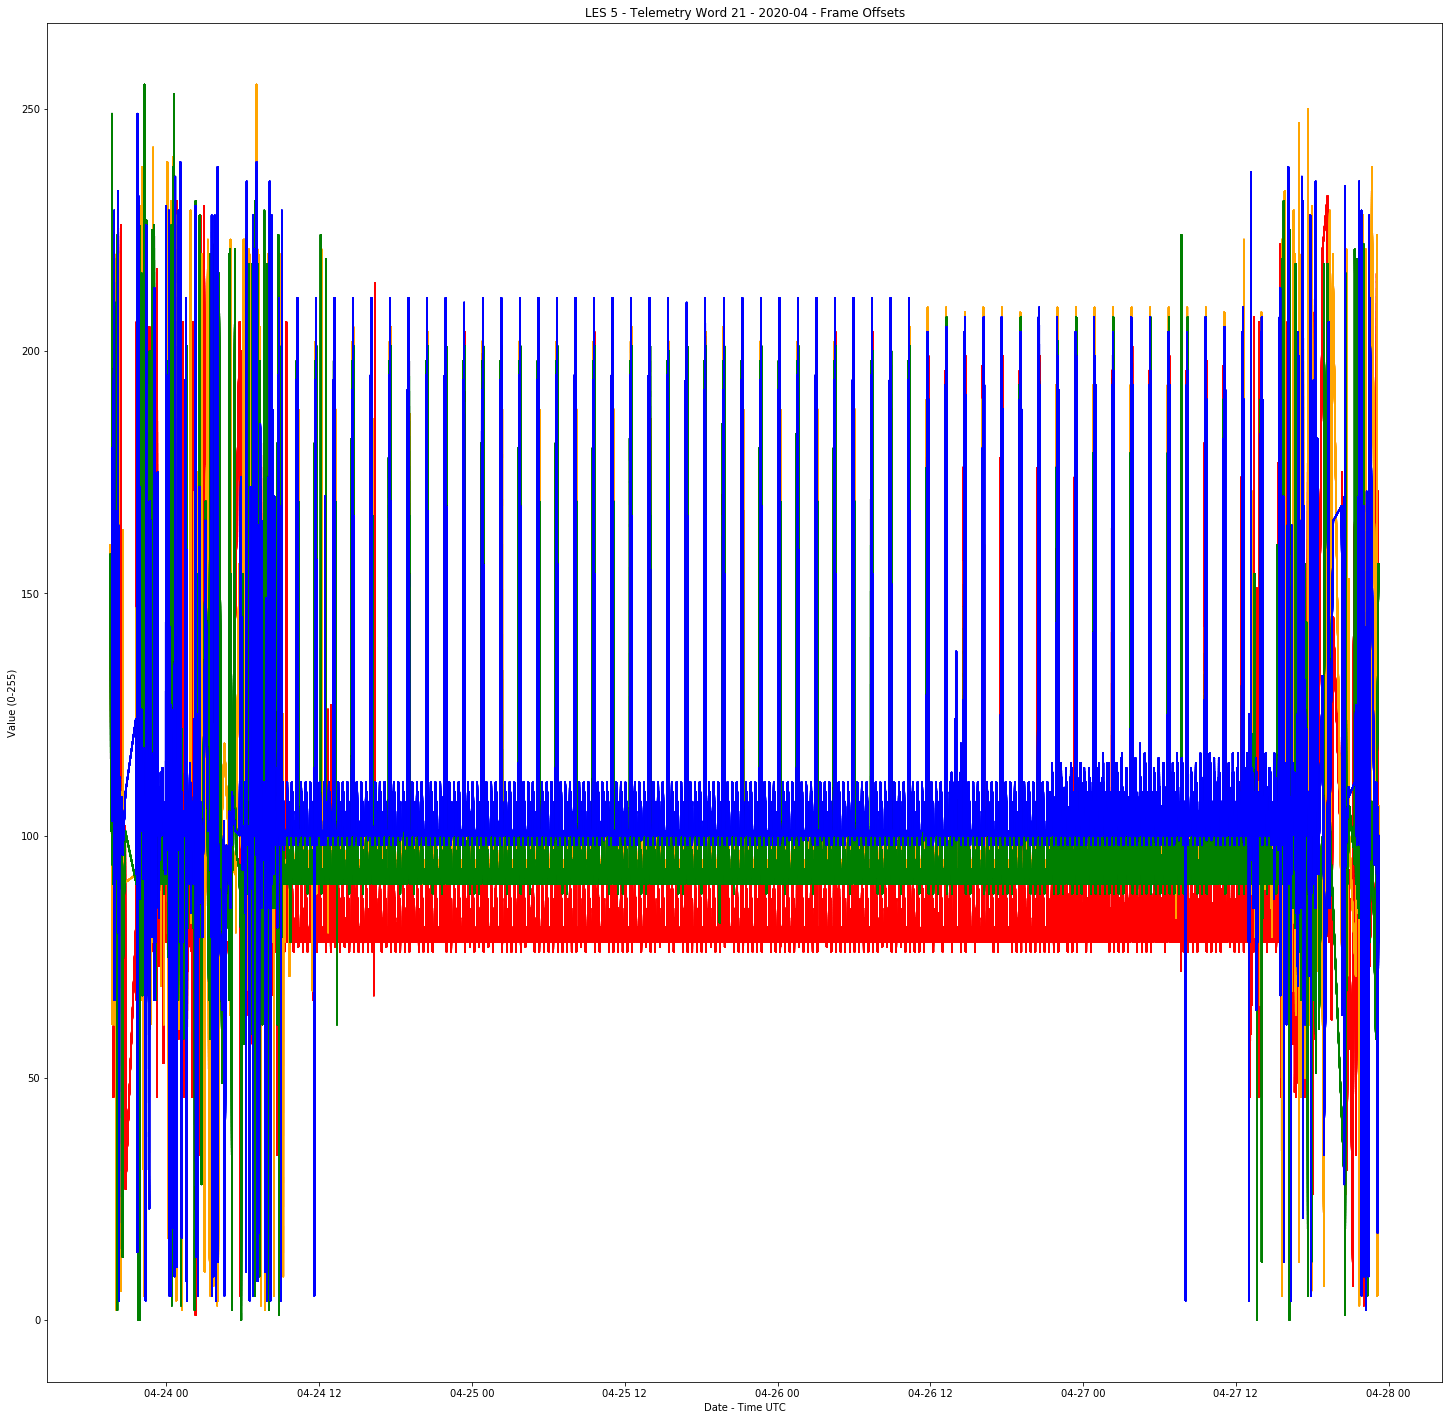

In [13]:
# RFI Experiment Channels unnormalized data
#%matplotlib qt
plt.figure(figsize = [25,25])
#plt.plot(t, rfi_frame21_normalized, '.', markersize=3, alpha=1, color='blue')
#plt.plot(t, rfi_frame21_normalized, markersize=3, alpha=1, color='blue')
plt.plot(t0, frame0_word_21, markersize=3, alpha=1, color='red')
plt.plot(t1, frame1_word_21, markersize=3, alpha=1, color='orange')
plt.plot(t2, frame2_word_21, markersize=3, alpha=1, color='green')
plt.plot(t3, frame3_word_21, markersize=3, alpha=1, color='blue')
plt.title('LES 5 - Telemetry Word 21 - 2020-04 - Frame Offsets')
plt.xlabel('Date - Time UTC')
plt.ylabel('Value (0-255)');
